In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston

In [10]:
boston = load_boston()
dir(boston)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [11]:
df = pd.DataFrame(boston.data, columns = boston.feature_names)

In [12]:
df['price'] = boston.target

In [13]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

In [15]:
poly_features = PolynomialFeatures(degree=2)

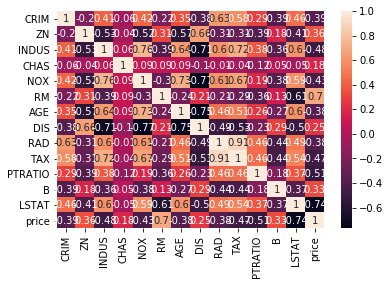

In [16]:
correlation = df.corr().round(2)
sns.heatmap(data=correlation,annot=True)

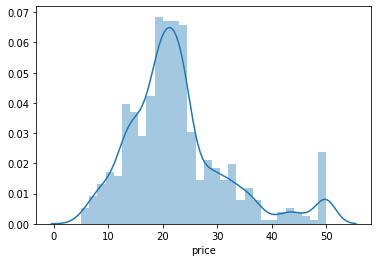

In [105]:

sns.distplot(df['price'],30)

In [7]:
X = df.drop('price', axis=1)
y = df['price']

In [88]:
def cor_selector(X, y,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    return cor_support, cor_feature
cor_support, cor_feature = cor_selector(X, y,2)
print(str(len(cor_feature)), 'selected features')
cor_feature

"def cor_selector(X, y,num_feats):\n    cor_list = []\n    feature_name = X.columns.tolist()\n    # calculate the correlation with y for each feature\n    for i in X.columns.tolist():\n        cor = np.corrcoef(X[i], y)[0, 1]\n        cor_list.append(cor)\n    # replace NaN with 0\n    cor_list = [0 if np.isnan(i) else i for i in cor_list]\n    # feature name\n    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()\n    # feature selection? 0 for not select, 1 for select\n    cor_support = [True if i in cor_feature else False for i in feature_name]\n    return cor_support, cor_feature\ncor_support, cor_feature = cor_selector(X, y,2)\nprint(str(len(cor_feature)), 'selected features')\ncor_feature"

In [89]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X_train)
chi_selector = SelectKBest(chi2, k=17)
chi_selector.fit(X_norm, y_train)
chi_support = chi_selector.get_support()
chi_feature = X_train.loc[:,chi_support].columns.tolist()
print(str(len(chi_feature)), 'selected features')
chi_feature

"chi square feature selector\nfrom sklearn.feature_selection import chi2\nfrom sklearn.preprocessing import MinMaxScaler\nX_norm = MinMaxScaler().fit_transform(X)\nchi_selector = SelectKBest(chi2, k=2)\nchi_selector.fit(X_norm, y)\nchi_support = chi_selector.get_support()\nchi_feature = X.loc[:,chi_support].columns.tolist()\nprint(str(len(chi_feature)), 'selected features')\nchi_feature"

In [92]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler
X_norm = MinMaxScaler().fit_transform(X)
rfe_selector = RFE(estimator=LogisticRegression(), n_features_to_select=2, step=10, verbose=5)
rfe_selector.fit(X_norm, y)
rfe_support = rfe_selector.get_support()
rfe_feature = X.loc[:,rfe_support].columns.tolist()
print(str(len(rfe_feature)), 'selected features')
rfe_feature

Fitting estimator with 13 features.


ValueError: Unknown label type: 'continuous'

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression

embeded_lr_selector = SelectFromModel(LogisticRegression(penalty="l1"), max_features=num_feats)
embeded_lr_selector.fit(X_norm, y)

embeded_lr_support = embeded_lr_selector.get_support()
embeded_lr_feature = X.loc[:,embeded_lr_support].columns.tolist()
print(str(len(embeded_lr_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=num_feats)
embeded_rf_selector.fit(X, y)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'selected features')

In [ ]:
from sklearn.feature_selection import SelectFromModel
from lightgbm import LGBMClassifier

lgbc=LGBMClassifier(n_estimators=500, learning_rate=0.05, num_leaves=32, colsample_bytree=0.2,
            reg_alpha=3, reg_lambda=1, min_split_gain=0.01, min_child_weight=40)

embeded_lgb_selector = SelectFromModel(lgbc, max_features=num_feats)
embeded_lgb_selector.fit(X, y)

embeded_lgb_support = embeded_lgb_selector.get_support()
embeded_lgb_feature = X.loc[:,embeded_lgb_support].columns.tolist()
print(str(len(embeded_lgb_feature)), 'selected features')

In [8]:
X_new = pd.DataFrame(np.c_[X[cor_feature[0]], X[cor_feature[1]]], columns=cor_feature)
X_new.dtype

NameError: name 'cor_feature' is not defined

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.2)

In [55]:
from sklearn.metrics import accuracy_score
X_poly_train = poly_features.fit_transform(X_train)

In [56]:
model = LinearRegression()
model.fit(X_poly_train,y_train)
y_train_predict = model.predict(X_poly_train)

In [57]:
X_poly_test = poly_features.fit_transform(X_test)

In [58]:
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predict))
print('rmse train: {}'.format(rmse_train))
r2_train = r2_score(y_train, y_train_predict)
print('r2 score train: {}'.format(r2_train))

rmse train: 4.431767180251999
r2 score train: 0.7570210619283227


In [59]:
y_test_predict = model.predict(X_poly_test)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
print('rmse test: {}'.format(rmse_test))
r2_test = r2_score(y_test, y_test_predict)
print('r2 score train: {}'.format(r2_test))

rmse test: 4.929558390691744
r2 score train: 0.7514807796999734
